In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

from embeddings import get_embedding_matrix

from gem import SentenceEmbedder
from utils import read_sts

In [2]:
glove_6B_300d_path = '../data/glove/glove.6B.300d.txt'
lexvec_7B_300d_path = '../data/lexvec/lexvec.enwiki+newscrawl.300d.W.pos.vectors'

In [3]:
sts_dev = read_sts('../data/sts_benchmark/sts-dev.csv')
sts_test = read_sts('../data/sts_benchmark/sts-test.csv')

In [4]:
sts_dev.shape, sts_test.shape

((1500, 3), (1379, 3))

In [5]:
sts_test.head()

,score,sentence1,sentence2
0,2.5,A girl is styling her hair.,A girl is brushing her hair.
1,3.6,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,5.0,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.
3,4.2,A man is cutting up a cucumber.,A man is slicing a cucumber.
4,1.5,A man is playing a harp.,A man is playing a keyboard.


In [6]:
%%time

dfs = {"(sts-dev)": sts_dev,
       "(sts-test)": sts_test}

embds = {"Glove": get_embedding_matrix(glove_6B_300d_path),
         "LexVec": get_embedding_matrix(lexvec_7B_300d_path, skip_line=True)}

CPU times: user 50.3 s, sys: 3.99 s, total: 54.3 s
Wall time: 55.8 s


In [7]:
%%time

print('Unigrams:\n\n')

for df_name, df in dfs.items():
    sentences = df.sentence1.values.tolist() + df.sentence2.values.tolist()
    for e_name, (e, v) in embds.items():
        model = SentenceEmbedder(sentences, e, v)
        embedded_sentences = model.gem(sigma_power=3)
        sent1_embs = embedded_sentences[:len(sentences) // 2]
        sent2_embs = embedded_sentences[-len(sentences) // 2:]
        cos_sims = cosine_similarity(sent1_embs, sent2_embs).diagonal()
        corr = pearsonr(df['score'].values, cos_sims)
        print("{:>8} + {:<8} {:>10}: {:<10}".format('GEM', e_name, df_name, corr[0]))
        
        embedded_sentences = model.mean_embeddings()
        sent1_embs = embedded_sentences[:len(sentences) // 2]
        sent2_embs = embedded_sentences[-len(sentences) // 2:]
        cos_sims = cosine_similarity(sent1_embs, sent2_embs).diagonal()
        corr = pearsonr(df['score'].values, cos_sims)
        print("{:>8} + {:<8} {:>10}: {:<10}".format('Mean', e_name, df_name, corr[0]))

Unigrams:


     GEM + Glove     (sts-dev): 0.7893357845629015
    Mean + Glove     (sts-dev): 0.517957452494933
     GEM + LexVec    (sts-dev): 0.7712879648983225
    Mean + LexVec    (sts-dev): 0.6663107325891187
     GEM + Glove    (sts-test): 0.6366006906456957
    Mean + Glove    (sts-test): 0.2376515681479994
     GEM + LexVec   (sts-test): 0.639251079864014
    Mean + LexVec   (sts-test): 0.3875377305564788
CPU times: user 2min 18s, sys: 10.7 s, total: 2min 28s
Wall time: 1min 15s


In [10]:
%%time

print('Bigrams:\n\n')

for df_name, df in dfs.items():
    sentences = df.sentence1.values.tolist() + df.sentence2.values.tolist()
    for e_name, (e, v) in embds.items():
        model = SentenceEmbedder(sentences, e, v)
        embedded_sentences = model.gem(sigma_power=3, ngrams=2)
        sent1_embs = embedded_sentences[:len(sentences) // 2]
        sent2_embs = embedded_sentences[-len(sentences) // 2:]
        cos_sims = cosine_similarity(sent1_embs, sent2_embs).diagonal()
        corr = pearsonr(df['score'].values, cos_sims)
        print("{:>8} + {:<8} {:>10}: {:<10}".format('GEM', e_name, df_name, corr[0]))
        
        embedded_sentences = model.mean_embeddings()
        sent1_embs = embedded_sentences[:len(sentences) // 2]
        sent2_embs = embedded_sentences[-len(sentences) // 2:]
        cos_sims = cosine_similarity(sent1_embs, sent2_embs).diagonal()
        corr = pearsonr(df['score'].values, cos_sims)
        print("{:>8} + {:<8} {:>10}: {:<10}".format('Mean', e_name, df_name, corr[0]))

Bigrams:


     GEM + Glove     (sts-dev): 0.7887874402736057
    Mean + Glove     (sts-dev): 0.517957452494933
     GEM + LexVec    (sts-dev): 0.7774679998788353
    Mean + LexVec    (sts-dev): 0.6663107325891187
     GEM + Glove    (sts-test): 0.6342502520637168
    Mean + Glove    (sts-test): 0.2376515681479994
     GEM + LexVec   (sts-test): 0.6510689233761388
    Mean + LexVec   (sts-test): 0.3875377305564788
CPU times: user 49.1 s, sys: 3.81 s, total: 52.9 s
Wall time: 27.5 s


In [11]:
%%time

print('Trigrams:\n\n')

for df_name, df in dfs.items():
    sentences = df.sentence1.values.tolist() + df.sentence2.values.tolist()
    for e_name, (e, v) in embds.items():
        model = SentenceEmbedder(sentences, e, v)
        embedded_sentences = model.gem(sigma_power=3, ngrams=3)
        sent1_embs = embedded_sentences[:len(sentences) // 2]
        sent2_embs = embedded_sentences[-len(sentences) // 2:]
        cos_sims = cosine_similarity(sent1_embs, sent2_embs).diagonal()
        corr = pearsonr(df['score'].values, cos_sims)
        print("{:>8} + {:<8} {:>10}: {:<10}".format('GEM', e_name, df_name, corr[0]))
        
        embedded_sentences = model.mean_embeddings()
        sent1_embs = embedded_sentences[:len(sentences) // 2]
        sent2_embs = embedded_sentences[-len(sentences) // 2:]
        cos_sims = cosine_similarity(sent1_embs, sent2_embs).diagonal()
        corr = pearsonr(df['score'].values, cos_sims)
        print("{:>8} + {:<8} {:>10}: {:<10}".format('Mean', e_name, df_name, corr[0]))

Trigrams:


     GEM + Glove     (sts-dev): 0.7835360047095904
    Mean + Glove     (sts-dev): 0.517957452494933
     GEM + LexVec    (sts-dev): 0.7773483673539873
    Mean + LexVec    (sts-dev): 0.6663107325891187
     GEM + Glove    (sts-test): 0.6488314415098579
    Mean + Glove    (sts-test): 0.2376515681479994
     GEM + LexVec   (sts-test): 0.6538780496149167
    Mean + LexVec   (sts-test): 0.3875377305564788
CPU times: user 25.9 s, sys: 1.93 s, total: 27.9 s
Wall time: 14.6 s


In [15]:
singular_values = model.singular_values

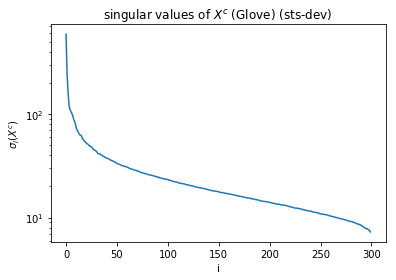

In [16]:
plt.plot(singular_values)
plt.yscale('log')
plt.title(r'singular values of $X^c$ (Glove) (sts-dev)')
plt.xlabel('i')
plt.ylabel(r'$\sigma_i(X^c)$')
plt.show()